In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
uber=pd.read_csv("UberData.csv")

In [3]:
columns=['START_DATE','END_DATE','CATEGORY','START','STOP','MILES','PURPOSE']

In [4]:
uber.columns=columns

# Project Goal 1:
    From which loaction maximum number uber rides are initiated?

In [5]:
uber['START'].value_counts().sort_values()

START
Gampaha                 1
Krendle Woods           1
Arlington               1
Connecticut Avenue      1
Hayesville              1
                     ... 
Islamabad              57
Whitebridge            68
Morrisville            85
Unknown Location      148
Cary                  201
Name: count, Length: 177, dtype: int64

# Observation 1:
    The maximum number of uber rides(201) where initiated from Cary.


# Project Goal 2:
    Which is the most common destination?


In [6]:
uber['STOP'].value_counts().sort_values()

STOP
Parkwood                  1
North Berkeley Hills      1
French Quarter            1
Wake Forest               1
Farmington Woods          1
                       ... 
Islamabad                58
Whitebridge              65
Morrisville              84
Unknown Location        149
Cary                    203
Name: count, Length: 188, dtype: int64

# Observation 2:
    The most common destination is Cary, which is a destination for 203 uber rides.

# Project Goal 3:
    What are the different reasons for which people take uber rides?

In [7]:
uber['PURPOSE'].value_counts()

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

# Observation 3:
    The different reasons for which people take uber rides are-
    1. Meeting            
    2. Meal or Entertain     
    3. Errand or Supplies    
    4. Customer Visit     
    5. Temporary Site      
    6. Between Offices     
    7. Moving               
    8. Airport or Travel       
    9. Charity           
    10. Commute    

# Project Goal 4:
    Find the percentage of people belonging to each category.

In [8]:
uber['CATEGORY'].value_counts()

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

In [9]:
total=1078+77
business=1078/total
personal=77/total
business_percentage=business*100
personal_percentage=personal*100

In [10]:
print(business_percentage,"%")
print(personal_percentage,"%")

93.33333333333333 %
6.666666666666667 %


# Observation 4:
    The percentage of people who chose business category is 93.34% 
    The percentage of people who chose personal category is 6.67%

# Project Goal 5:
    The given data belongs to which year? Is this a leap year?

In [46]:
uber.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [37]:
uber.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [39]:
#removing last row as we have to apply datetime function so the format should match with all values
uber=uber.drop(index=1155)

In [40]:
uber.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [42]:
uber['START_DATE'] = pd.to_datetime(uber['START_DATE'])
uber['END_DATE'] = pd.to_datetime(uber['END_DATE'])

In [53]:
uber['START_DATE'].dt.year

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1150    2016
1151    2016
1152    2016
1153    2016
1154    2016
Name: START_DATE, Length: 1155, dtype: int32

In [54]:
uber['START_DATE'].dt.year.value_counts()

START_DATE
2016    1155
Name: count, dtype: int64

In [57]:
uber['START_DATE'].dt.is_leap_year

0       True
1       True
2       True
3       True
4       True
        ... 
1150    True
1151    True
1152    True
1153    True
1154    True
Name: START_DATE, Length: 1155, dtype: bool

In [58]:
uber['START_DATE'].dt.is_leap_year.value_counts()

START_DATE
True    1155
Name: count, dtype: int64

# Observation 5:
    The given data is of 2016 (leap year).

# Project Goal 6:
    How long(miles) do people travel in Uber?

In [61]:
uber['MILES']

0        5.1
1        5.0
2        4.8
3        4.7
4       63.7
        ... 
1150     0.7
1151     3.9
1152    16.2
1153     6.4
1154    48.2
Name: MILES, Length: 1155, dtype: float64

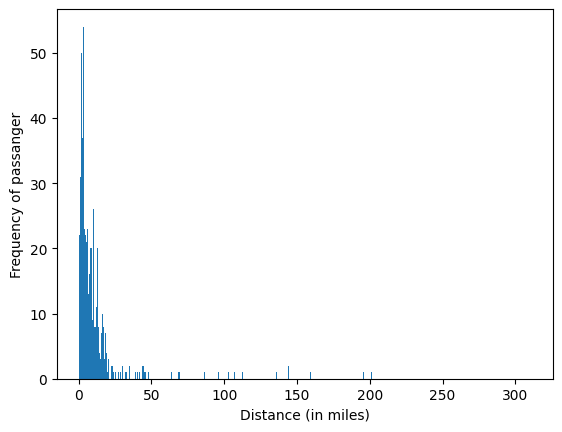

In [69]:
plt.hist(uber['MILES'],bins=1000)
plt.xlabel("Distance (in miles)")
plt.ylabel("Frequency of passanger")
plt.show()

# Observation 6:
    People often use uber for short distances

# Project Goal 7:
    Around which hours do most people take uber?


In [73]:
#Creating new column as hour
uber['HOUR']=uber['START_DATE'].dt.hour

In [74]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14


In [75]:
uber['HOUR']

0       21
1        1
2       20
3       17
4       14
        ..
1150     1
1151    13
1152    15
1153    21
1154    22
Name: HOUR, Length: 1155, dtype: int32

In [76]:
uber['HOUR'].value_counts()

HOUR
15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    51
8     35
22    31
23    26
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: count, dtype: int64

<Axes: xlabel='HOUR', ylabel='count'>

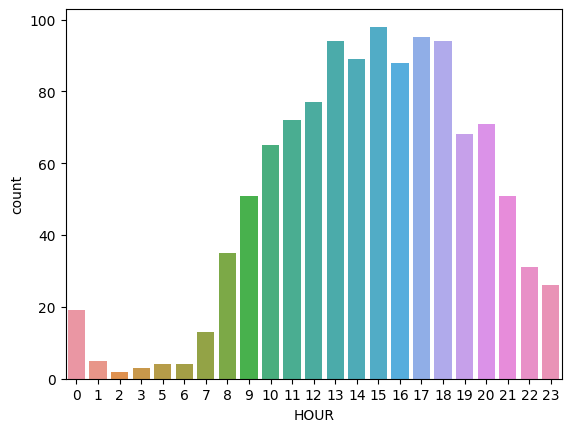

In [87]:
sns.countplot(x=uber['HOUR'])

# Observation 7:
    Between 1pm and 6pm , maximum number of people take uber rides.

# Project Goal 8:
    Around which hours do least people take uber?

<Axes: xlabel='HOUR', ylabel='count'>

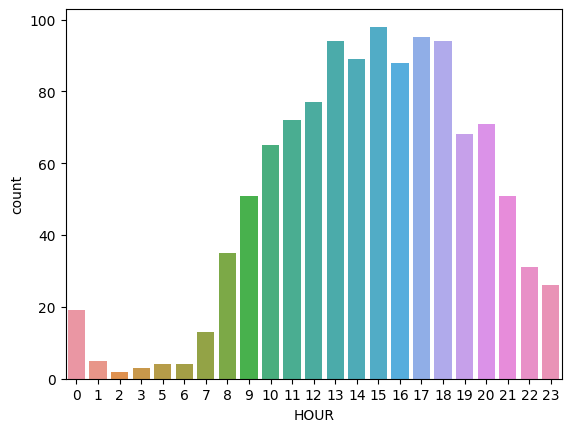

In [88]:
sns.countplot(x=uber['HOUR'])

# Observation 8:
    Between 1am and 6am , minimum number of people take uber rides.

# Project Goal 9:
    Which day has the highest number of trips?

In [107]:
#Creating new column as day
uber['DAY']=uber['START_DATE'].dt.day_of_week

In [108]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,2


<Axes: xlabel='DAY'>

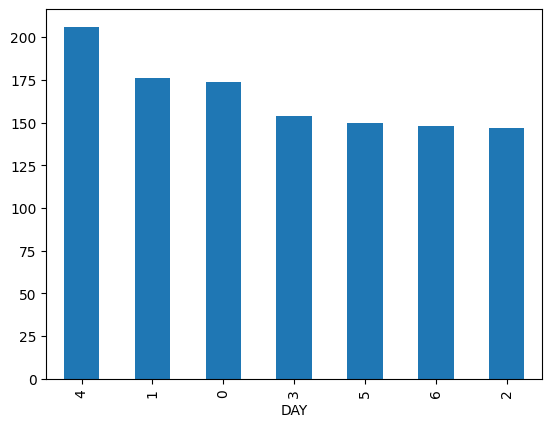

In [109]:
uber['DAY'].value_counts().plot(kind='bar')

# Observation 9:
    Friday has the maximum number of uber trips.

# Project Goal 10:
    What are the number of rides each day?

In [110]:
uber['DAY'].value_counts().unique

<bound method Series.unique of DAY
4    206
1    176
0    174
3    154
5    150
6    148
2    147
Name: count, dtype: int64>

# Observation 10:
    174 uber rides on monday.
    176 uber rides on tuesday.
    147 uber rides on wednesday. 
    154 uber rides on thursday.
    206 uber rides on friday.
    150 uber rides on saturday.
    148 uber rides on on sunday.